# Projeto de módulo 4 - Resilia - Analisando e tratando dados



Nosso objetivo nesse projeto é realizar a análise de dois datasets diferentes, relacionados aos preços, datas e locais de venda de todo tipo de combustível, no período de Junho a Julho de 2021

Importando as bibliotecas que serão utilizadas na nossa análise

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta

## Análise de Dados do mês de Junho de 2021

### Importando nossos dados diretamente da URL

In [2]:
link = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
dados_jun = pd.read_csv(link,sep=';')

## Realizando a limpeza dos dados de Junho de 2021

Verificando os dados antes de qualquer alteração, para localizar qualquer irregularidade

In [ ]:
dados_jun.head()

Verificando se existem dados com valores nulos em suas células ( Valores NaN )

In [ ]:
dados_jun.isna().sum()

Fazendo a substituição dos valores nulos ( NaN ) pela string **"Sem Complemento"**

In [5]:
dados_jun = dados_jun.fillna("Sem Complemento")

Deletando a coluna **"Valor de Compra"**, pois nessa coluna inexistem informações.

In [6]:
del dados_jun['Valor de Compra']

Substituindo todos os "Sem Complemento" na coluna Bairro pela string "N/A"

In [7]:
dados_jun['Bairro'] = dados_jun['Bairro'].replace(['Sem Complemento'],'N/A')

Removendo valores duplicados nas linhas

In [ ]:
dados_jun.duplicated()
dados_jun.drop_duplicates()

Verificando se os dados foram substituídos corretamente

In [ ]:
dados_jun[(dados_jun['Bairro'] == 'N/A')]

Aplicando métodos para atualização de colunas, ao analisar, percebi que estavam em valores **string**, e não **inteiro**, aplicando a função lambda para atualização de células.

In [10]:
dados_jun['Valor de Venda'] = dados_jun['Valor de Venda'].apply(lambda x:str(x).replace(",","."))
dados_jun['Valor de Venda'] = dados_jun['Valor de Venda'].astype('float64')
dados_jun['Cep'] = dados_jun['Cep'].apply(lambda x:str(x).replace("-","."))
dados_jun['Cep'] = dados_jun['Cep'].astype('float64')
dados_jun['CNPJ da Revenda'] = dados_jun['CNPJ da Revenda'].apply(lambda x:str(x).replace("/",".").replace("-","."))
dados_jun['CNPJ da Revenda'] = dados_jun['CNPJ da Revenda'].apply(lambda x:str(x).replace(".",""))

Ao verificar também, nota-se que a coluna de **"Data da Coleta"** não está em *DataStamp*, e sim em *String*, portanto, aplicamos uma função também para corrigir isso.

In [11]:
dados_jun['Data da Coleta'] = pd.to_datetime(dados_jun['Data da Coleta'])

Verificando os tipos de dados dentro de cada coluna no DataFrame

In [ ]:
dados_jun.dtypes

Após esses procedimentos, nossos dados estão limpos e prontos para a análise, são procedimentos simples mas são fundamentais para que a análise ocorra de forma precisa e coesa, e que erros não apareçam durante ela. Abaixo vou fazer uma nova verificação de dados, imprimindo todo nosso *DataSet* e dar aquela última checada.

Última verificação para integridade dos dados.

In [ ]:
dados_jun

## Análise dos Dados do mês de Julho de 2021

In [ ]:
link2 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
dados_jul = pd.read_csv(link2,sep=';')
dados_jul

***Descrição utilizando 'ALL' para conter todos os dados***

In [ ]:
dados_jul.describe(include= 'all')

***Print Informações do DataFrame***

In [ ]:
dados_jul.info()

***Converter 'Valor de Venda' para float***

In [17]:
dados_jul["Valor de Venda"] = dados_jul["Valor de Venda"].replace(",",".", regex=True).astype(float)

In [18]:
dados_jul['Data da Coleta'] = dados_jul['Data da Coleta'].astype('datetime64[ns]')


In [ ]:
dados_jul.info()

***Verificando dados nulos para cada coluna***

In [ ]:
dados_jul.isna().sum()

***Remover do dataframe qualquer duplicata presente:***



In [ ]:
#dados_jul = dados_jul.drop_duplicates()
dados_jul.duplicated()

***Subistituir dados nulos por "Sem complemento"***

In [22]:
dados_jul = dados_jul.fillna("Sem Complemento")

***Deletar a coluna "Valor de Compra" (não possui dados)***

In [23]:
del dados_jul['Valor de Compra']

***Substituir todos "Sem Complemento" na coluna Bairro pela string "N/A"***


In [24]:
dados_jul['Bairro'] = dados_jul['Bairro'].replace(['Sem Complemento'],'N/A')

***Verificando alterações***

In [ ]:
dados_jul

## PERGUNTA 1: 
Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

In [ ]:
analise_jul.groupby('Produto').mean().sort_values(by='Produto')

In [ ]:
analise_jun.groupby('Produto').mean().sort_values(by='Produto')

## PERGUNTA 2:
Qual o preço médio da gasolina e do etanol nesses dois meses?

In [ ]:
analise_jun.groupby('Produto').mean()

In [ ]:
analise_jul.groupby('Produto').mean()

## PERGUNTA 3:
Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [ ]:
gasolina_aditivada_concat.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda' ,ascending=False)[:5].plot(kind = 'barh')

In [ ]:
gasolina_concat.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda' ,ascending=False)[:5].plot(kind = 'barh')

In [ ]:
etanol_concat.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda' ,ascending=False)[:5].plot(kind = 'barh')

## PERGUNTA 4:
Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
round(dados_concat.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Estado - Sigla'),3)

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                       5.535
               GASOLINA                     6.443
               GASOLINA ADITIVADA           6.424
AL             ETANOL                       5.187
               GASOLINA                     5.958
...                                           ...
SP             GASOLINA                     5.462
               GASOLINA ADITIVADA           5.630
TO             GASOLINA                     5.934
               ETANOL                       5.133
               GASOLINA ADITIVADA           6.037

[81 rows x 1 columns]

In [ ]:
round(dados_concat.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Estado - Sigla', ascending= False),3).plot(kind = 'barh', figsize=(20,30))

## PERGUNTA 5:
 Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
gasolina_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
MT,SORRISO,GASOLINA,4.398


In [ ]:
gasolina_aditivada_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
SP,COTIA,GASOLINA ADITIVADA,4.199


In [ ]:
etanol_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
SP,SANTA BARBARA D'OESTE,ETANOL,3.097


## PERGUNTA 6:
Qual o município que possui o maior preço para a gasolina e para o etanol?

In [ ]:
gasolina_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda', ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
RS,BAGE,GASOLINA,6.999


In [ ]:
gasolina_aditivada_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda', ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
RS,BAGE,GASOLINA ADITIVADA,7.097


In [ ]:
etanol_concat.groupby(['Estado - Sigla','Município','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda', ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Município,Produto,
RS,PELOTAS,ETANOL,6.999


## PERGUNTA 7:
Qual a região que possui o maior valor médio da gasolina?

In [ ]:
gasolina_aditivada_concat.groupby(['Região - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda',ascending=False)[:1]

,,Valor de Venda
Região - Sigla,Produto,
NE,GASOLINA ADITIVADA,5.992951


In [ ]:
gasolina_concat.groupby(['Região - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda',ascending=False)[:1]

,,Valor de Venda
Região - Sigla,Produto,
CO,GASOLINA,5.901902


## PERGUNTA 8:
Qual a região que possui o menor valor médio do etanol?

In [ ]:
etanol_concat.groupby(['Região - Sigla','Produto'])[['Valor de Venda']].mean().sort_values(by='Valor de Venda',ascending=True)[:1]

,,Valor de Venda
Região - Sigla,Produto,
SE,ETANOL,4.354765


## PERGUNTA 9:
Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [ ]:
dados_concat.groupby(['Região - Sigla','Produto'])[['Valor de Venda']].mean().sort_index()

Valor de Venda
Região - Sigla Produto                           
CO             ETANOL                    4.406943
               GASOLINA                  5.901902
               GASOLINA ADITIVADA        5.989400
N              ETANOL                    5.046574
               GASOLINA                  5.820873
               GASOLINA ADITIVADA        5.949940
NE             ETANOL                    5.090050
               GASOLINA                  5.856517
               GASOLINA ADITIVADA        5.992951
S              ETANOL                    4.819885
               GASOLINA                  5.705432
               GASOLINA ADITIVADA        5.845881
SE             ETANOL                    4.354765
               GASOLINA                  5.663083
               GASOLINA ADITIVADA        5.826678

## PERGUNTA 10:
Há alguma relação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
bandeira_venda = dados_concat[['Bandeira','Valor de Venda']]
bandeira_venda


,Bandeira,Valor de Venda
0,IPIRANGA,5.499
1,IPIRANGA,5.200
2,IPIRANGA,5.699
3,PETROBRAS DISTRIBUIDORA S.A.,5.490
4,PETROBRAS DISTRIBUIDORA S.A.,4.990
...,...,...
97581,BRANCA,5.590
97582,BRANCA,4.720
97583,BRANCA,5.670
97584,BRANCA,4.790


In [ ]:
#Bandeira branca é a mais utilizada para venda de combustivel, com a visualização mais limpa
count_bandeira = bandeira_venda.groupby('Bandeira').count().sort_values(by = 'Valor de Venda', ascending=False)
#Mudando o valor de Venda para Total
count_bandeira.columns = ['Total']
count_bandeira.head()

,Total
Bandeira,
BRANCA,35927
PETROBRAS DISTRIBUIDORA S.A.,20632
IPIRANGA,16965
RAIZEN,16254
ALESAT,2046


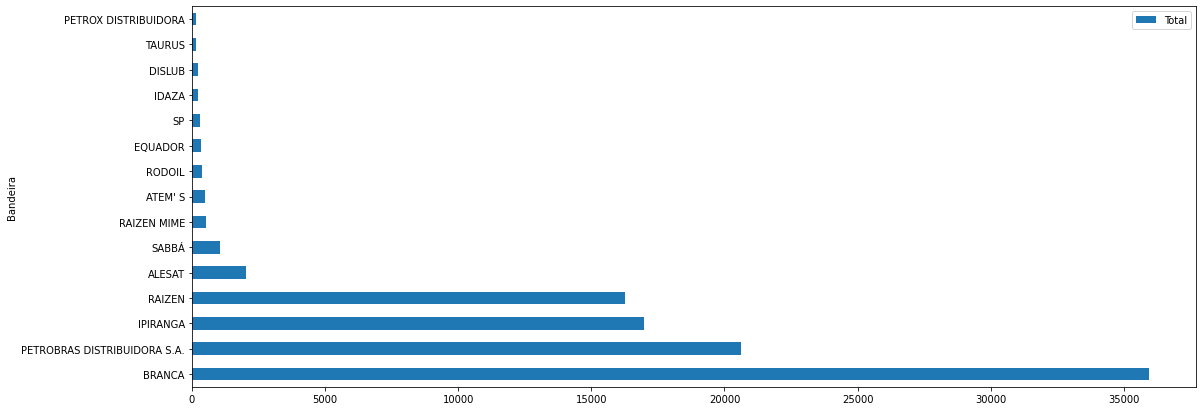

In [ ]:
count_bandeira.head(15).plot(kind = 'barh',figsize = (18,7))

Comparar o preço da bandeira da ATEM's nos estados que ela atende.

## PERGUNTA 11:


In [ ]:
estados_ATEM = dados_concat[dados_concat['Estado - Sigla'].isin(["SP", "AM", "BA", "PE", "RN", "CE", "RJ", "MG", "SP", "RS", "PR"])]

In [ ]:
dados_concat_rename = dados_concat.rename(columns={'Região - Sigla': 'Regiao', 'Estado - Sigla': 'Estado', 'Município':'Municipio', 'Valor de Venda': 'Valor', 'Data da Coleta':'Data'})
estados_ATEM = dados_concat_rename.query('Estado == ["MT","MS","AM","AC","TO","AP","PA","RR","RO"]')


In [ ]:
round(estados_ATEM.groupby('Bandeira').mean().sort_values(by = 'Valor', ascending=False),3)

,Valor
Bandeira,
SP,5.979
EQUADOR,5.780
ALESAT,5.724
SABBÁ,5.642
IPIRANGA,5.639
PETROBRAS DISTRIBUIDORA S.A.,5.617
CIAPETRO,5.476
WATT,5.446
RAIZEN,5.379


## PERGUNTA 12:
Relação do preço dos combustíveis com a presença/proximidade de refinarias<br>
Estados que possuem refinarias: AM; BA; PE; RN; CE; RJ; MG; SP; RS; e PR.

## R12

In [ ]:
dados_concat_rename = dados_concat.rename(columns={'Região - Sigla': 'Regiao', 'Estado - Sigla': 'Estado', 'Município':'Municipio', 'Valor de Venda': 'Valor', 'Data da Coleta':'Data'})
estados_com_refinaria = dados_concat_rename.query('Estado == ["SP", "AM", "BA", "PE", "RN", "CE", "RJ", "MG", "SP", "RS", "PR"]')
estados_sem_refinaria = dados_concat_rename.query('Estado == ["AC","AL","AP","DF","ES","GO","MA","MT","MS","PA","PB","PI","RO","RR","SC","SE","TO"]')
a = estados_com_refinaria.groupby('Estado')
b = round(a['Valor'].mean(),3)
ax = b.plot.bar(x='Estado', y='Valor', rot=0)

In [ ]:
a = estados_sem_refinaria.groupby('Estado')
b = round(a['Valor'].mean(),3)
ax = b.plot.bar(x='Estado', y='Valor', rot=0)

In [ ]:
estados_com_refinaria.groupby('Produto').mean()

In [ ]:
estados_sem_refinaria.groupby('Produto').mean()